In [1]:
import sys
import numpy as np
from scipy.stats import spearmanr
sys.path.insert(0,'..')
from fairness import *

In [2]:
np.random.seed(2)
n_rows = 1000
n_proxies = 5
n_characteristics = 5
df = pd.DataFrame()
df['unique_id'] = range(n_rows)
df['consumption'] = 0
for proxy in range(n_proxies):
    df['proxy' + str(proxy)] = df['consumption'] + np.random.randint(size=n_rows, low=0, high=proxy+5)
for characteristic in range(n_characteristics):
    n_categories = np.random.randint(low=2, high=7)
    df['characteristic' + str(characteristic)] = np.random.randint(size=n_rows, low=0, high=n_categories)
    df['characteristic' + str(characteristic)] = df['characteristic' + str(characteristic)]\
        .apply(lambda x: 'group' + str(x))
for proxy in ['proxy0', 'proxy1']:
    df[proxy] = df[proxy] + df['characteristic1'].apply(lambda x: int(x[-1]))
df['weight'] = np.random.randint(10, 100, size=n_rows)
df.to_csv('../synthetic_data/fairness.csv', index=False)

In [3]:
datastore = DataStore('../configs/config_new.yml')

In [4]:
fairness = Fairness(datastore)

In [ ]:
fairness.rank_residuals_plot('consumption', ['proxy0', 'proxy1', 'proxy3', 'proxy4'], 'characteristic1')

In [ ]:
fairness.rank_residuals_table('consumption', ['proxy0', 'proxy1', 'proxy3'], 'characteristic1')

In [ ]:
fairness.demographic_parity_table('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', 27)

In [ ]:
fairness.demographic_parity_plot('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3', 'proxy4'], 
                                 'characteristic1', 27)

In [ ]:
fairness.independence('consumption', 'proxy0', 'characteristic1', 27)

In [5]:
fairness.recall_table('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', 27)

,characteristic1,Group's share of population,proxy0,proxy1,proxy2,proxy3
0,group0,24.90%,0.676056,0.647887,0.211268,0.366197
1,group1,25.70%,0.343284,0.477612,0.208955,0.313433
2,group2,25.90%,0.102941,0.220588,0.279412,0.264706
3,group3,23.50%,0.000000,0.203125,0.234375,0.359375


[[0.0, 0.203125, 0.234375, 0.359375], [0.10294117647058823, 0.22058823529411764, 0.27941176470588236, 0.2647058823529412], [0.34328358208955223, 0.47761194029850745, 0.208955223880597, 0.31343283582089554], [0.676056338028169, 0.647887323943662, 0.2112676056338028, 0.36619718309859156]]


..\fairness.py:447: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
..\fairness.py:450: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "index" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(self.outputs + '/recall_plot_' + characteristic + '_' + str(p) + '%.png', index=False)


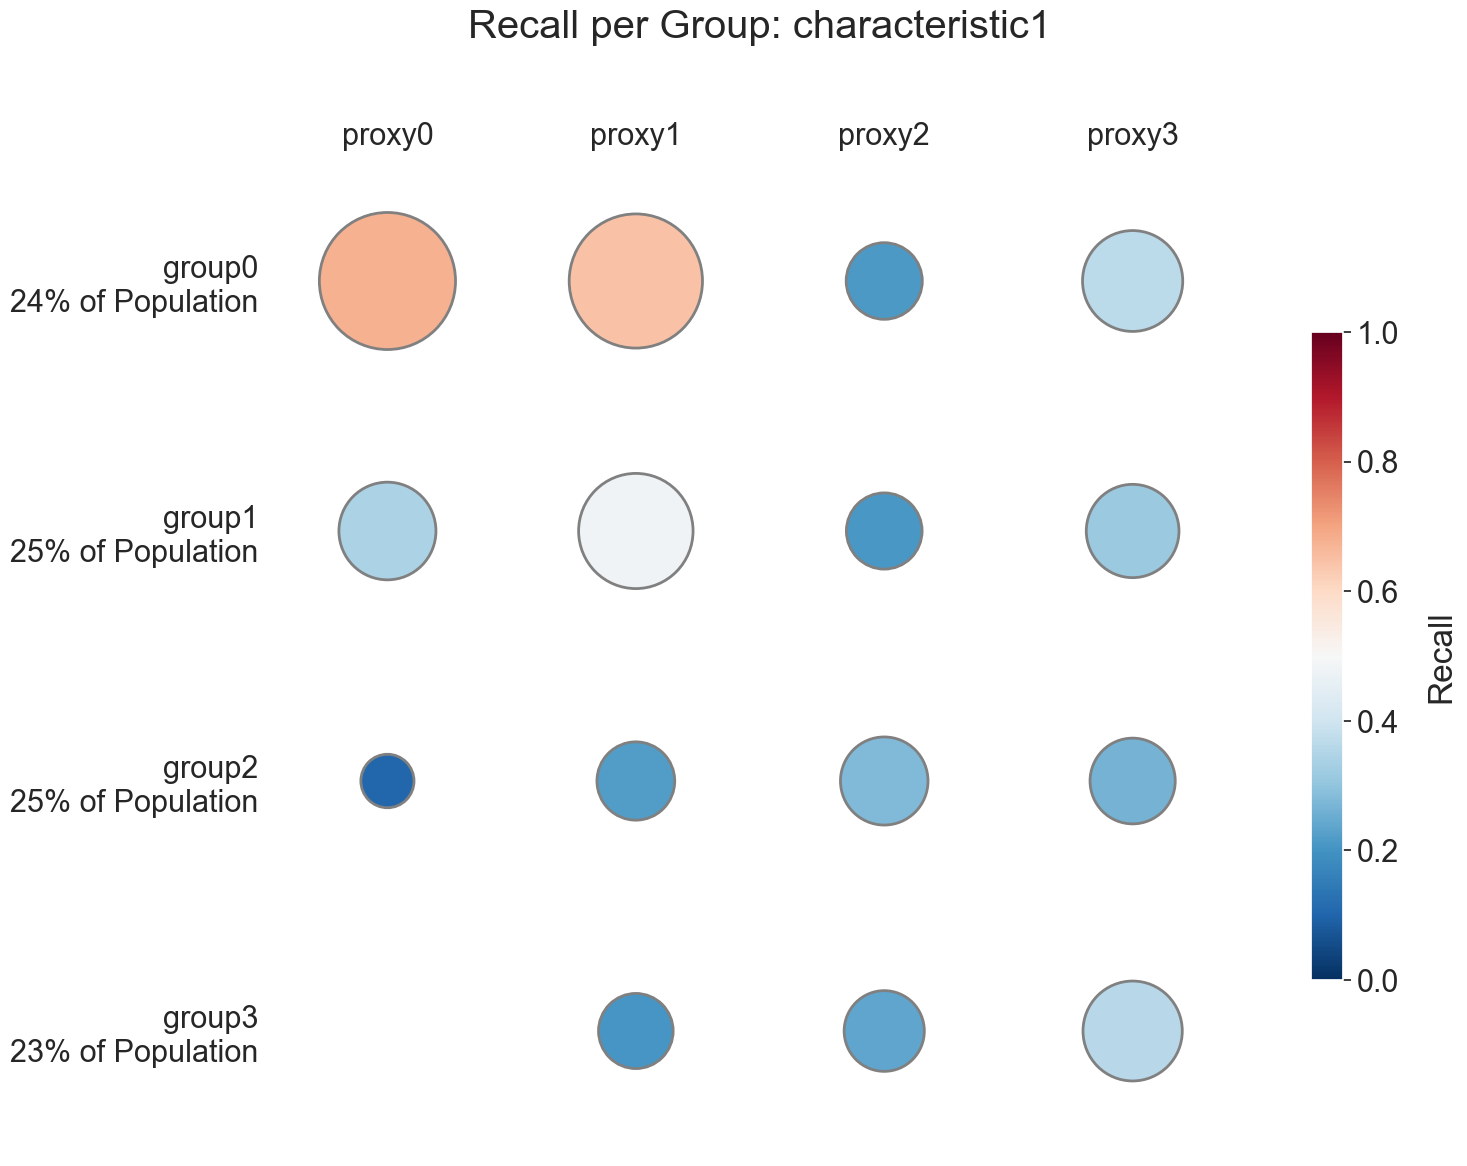

In [6]:
fairness.recall_plot('consumption', ['proxy0', 'proxy1', 'proxy2', 'proxy3'], 'characteristic1', 27)